In [163]:
import numpy as np
import pandas as pd
import sklearn
import keras
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.layers import Input
from keras import Model



In [164]:
iris_dataset = load_iris()
print(iris_dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [165]:
X = iris_dataset["data"]
y= iris_dataset["target"]
X.shape, y.shape

((150, 4), (150,))

In [166]:
np.unique(y)

array([0, 1, 2])

In [167]:
iris_dataset
iris_dataframe = pd.DataFrame(X, columns = iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


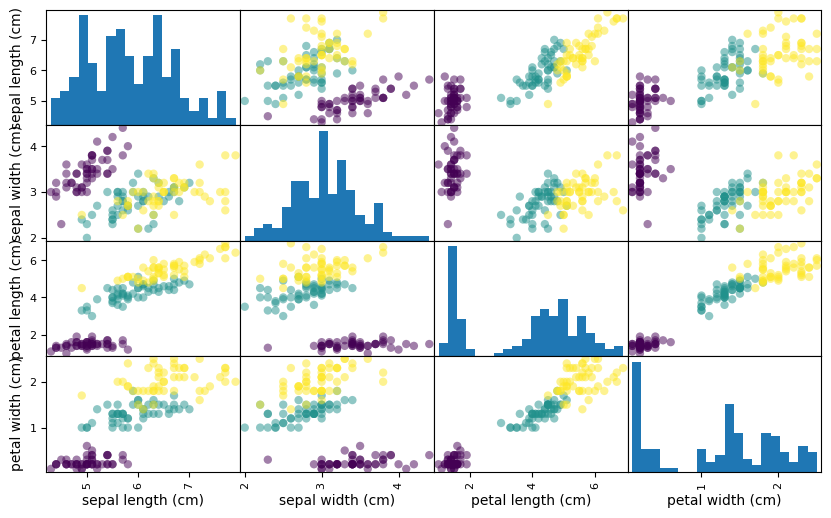

In [168]:
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y, figsize=(10,6), marker='o', hist_kwds={"bins":20})

# Linear Regression

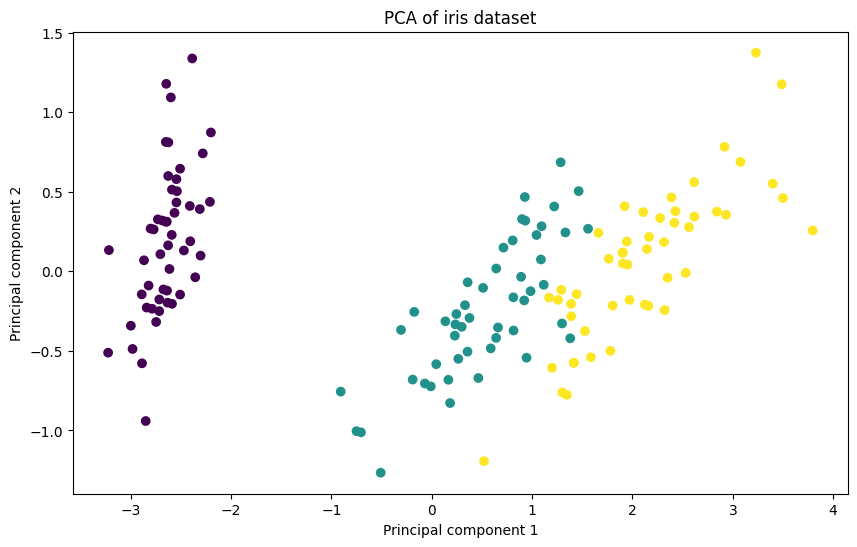

In [169]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("PCA of iris dataset")
plt.show()

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

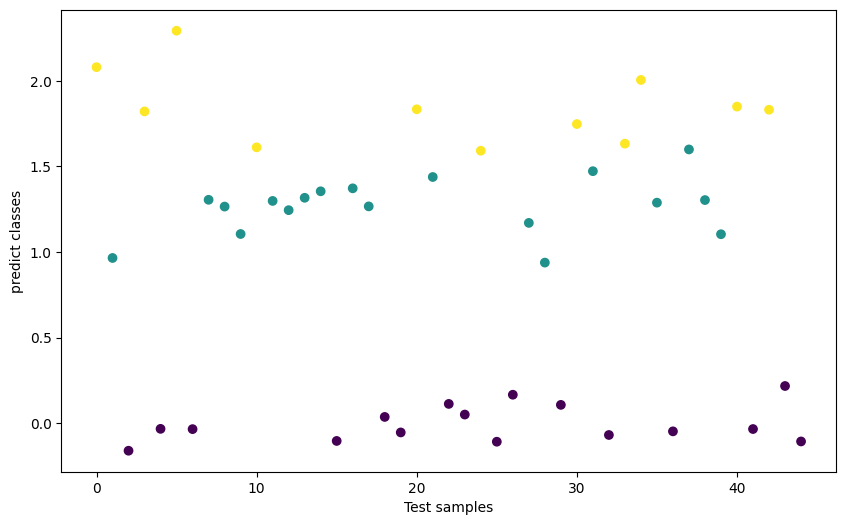

In [171]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr=lr_model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(range((len(y_pred_lr))), y_pred_lr, marker="o", c=y_test)
plt.xlabel("Test samples")
plt.ylabel("predict classes")
plt.show()

In [172]:
def tresholding(y_pred):
    y_pred_class = y_pred.copy()
    y_pred_class[y_pred<0.5]=0
    y_pred_class[y_pred>0.5]=1
    y_pred_class[y_pred>1.5]=2
    return y_pred_class;
    

In [173]:
def plot_classification(y_class, y_test):
    plt.figure(figsize=(10,6))
    plt.scatter(range((len(y_class))), y_class, marker="o", c=y_test)
    plt.xlabel("Test samples")
    plt.ylabel("predict classes")
    plt.show() 

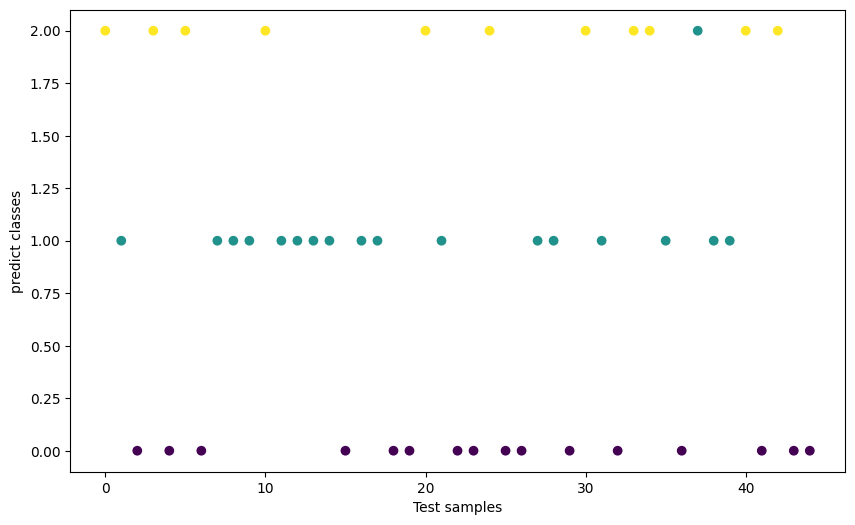

In [174]:
y_class_lr = tresholding(y_pred_lr)
plot_classification(y_class_lr, y_test=y_test)

# Adaline
(non linear neuron)

In [175]:
num_features = X.shape[1]

input_layer = Input(shape = (num_features, ))
linear_neuron = Dense(1)(input_layer)

adaline = Model(inputs=[input_layer], outputs=[linear_neuron])
adaline.compile(optimizer="sgd", loss="mse")

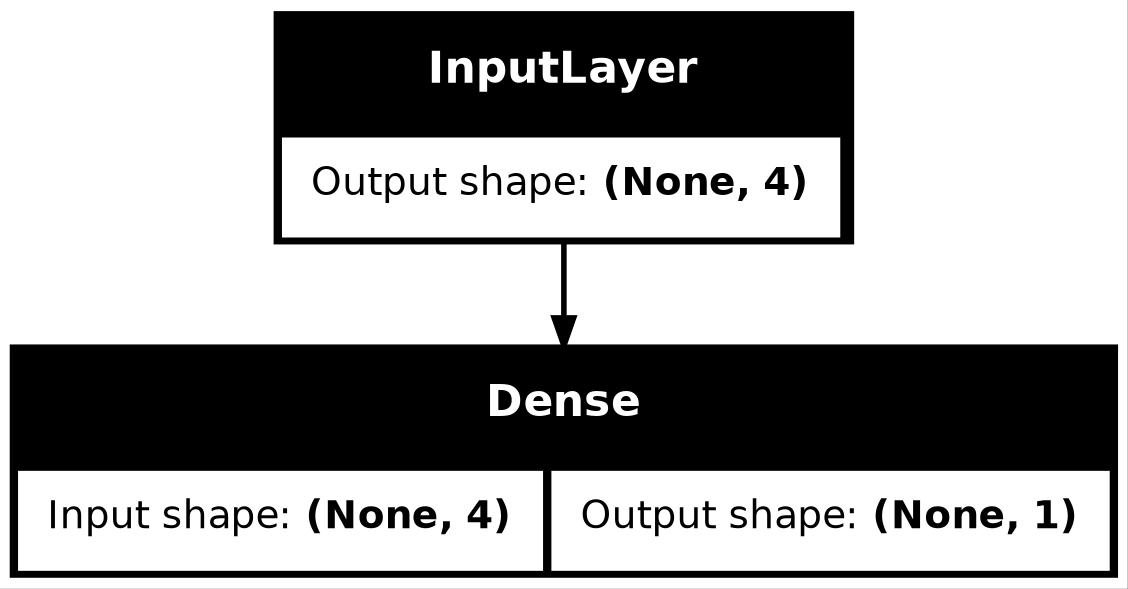

In [176]:
keras.utils.plot_model(adaline, to_file="adaline.jpg", show_shapes= True)

In [177]:
adaline.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=X_train.shape[0],
    validation_data=(X_test, y_test),
    verbose=2,
)

Epoch 1/300


/home/radekbys/Code/Neural_Networks/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_33']. Received: the structure of inputs=*
  warnings.warn(


1/1 - 0s - 350ms/step - loss: 7.9421 - val_loss: 0.5494
Epoch 2/300
1/1 - 0s - 32ms/step - loss: 0.7087 - val_loss: 0.2158
Epoch 3/300
1/1 - 0s - 30ms/step - loss: 0.1598 - val_loss: 0.1271
Epoch 4/300
1/1 - 0s - 32ms/step - loss: 0.1152 - val_loss: 0.1342
Epoch 5/300
1/1 - 0s - 28ms/step - loss: 0.1089 - val_loss: 0.1279
Epoch 6/300
1/1 - 0s - 30ms/step - loss: 0.1057 - val_loss: 0.1264
Epoch 7/300
1/1 - 0s - 31ms/step - loss: 0.1029 - val_loss: 0.1240
Epoch 8/300
1/1 - 0s - 35ms/step - loss: 0.1004 - val_loss: 0.1221
Epoch 9/300
1/1 - 0s - 29ms/step - loss: 0.0981 - val_loss: 0.1202
Epoch 10/300
1/1 - 0s - 28ms/step - loss: 0.0960 - val_loss: 0.1186
Epoch 11/300
1/1 - 0s - 28ms/step - loss: 0.0941 - val_loss: 0.1171
Epoch 12/300
1/1 - 0s - 28ms/step - loss: 0.0923 - val_loss: 0.1157
Epoch 13/300
1/1 - 0s - 45ms/step - loss: 0.0906 - val_loss: 0.1145
Epoch 14/300
1/1 - 0s - 28ms/step - loss: 0.0891 - val_loss: 0.1133
Epoch 15/300
1/1 - 0s - 35ms/step - loss: 0.0877 - val_loss: 0.1123


In [178]:
y_pred_adaline = adaline.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


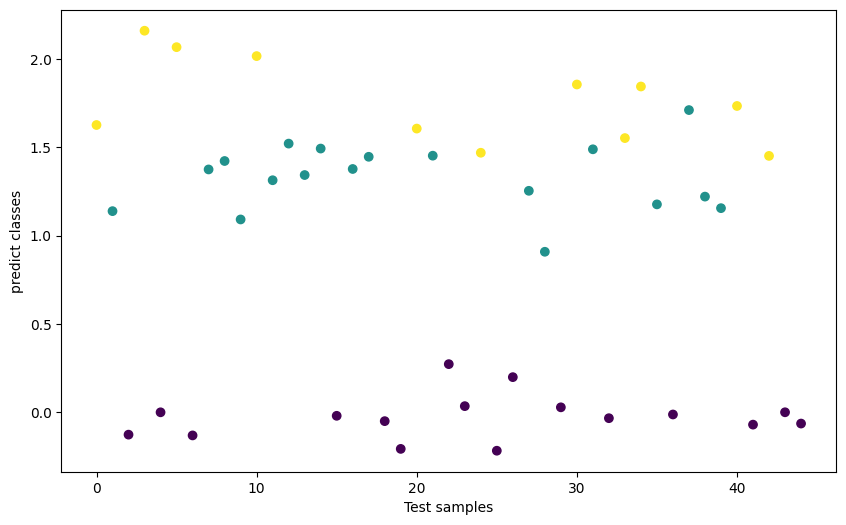

In [179]:
plot_classification(y_pred_adaline, y_test)

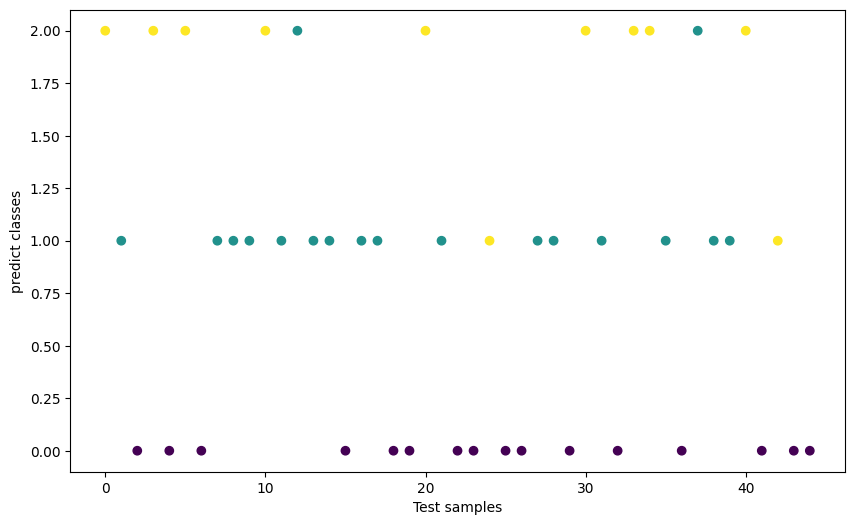

In [180]:
y_class_adaline = tresholding(y_pred_adaline)
plot_classification(y_class_adaline, y_test)

# Non linear neuron

In [181]:
input_layer = Input(shape=(num_features, ))
neuron = Dense(1, activation="relu")(input_layer)

nonlinear_neuron = Model(inputs=[input_layer], outputs=[neuron])
nonlinear_neuron.compile(optimizer='sgd', loss="mse")

nonlinear_neuron.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=X_train.shape[0],
    validation_data=(X_test, y_test),
    verbose=2,
)

Epoch 1/300


/home/radekbys/Code/Neural_Networks/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_35']. Received: the structure of inputs=*
  warnings.warn(


1/1 - 0s - 341ms/step - loss: 1.1238 - val_loss: 0.1301
Epoch 2/300
1/1 - 0s - 28ms/step - loss: 0.1119 - val_loss: 0.1338
Epoch 3/300
1/1 - 0s - 30ms/step - loss: 0.1083 - val_loss: 0.1331
Epoch 4/300
1/1 - 0s - 28ms/step - loss: 0.1081 - val_loss: 0.1328
Epoch 5/300
1/1 - 0s - 28ms/step - loss: 0.1078 - val_loss: 0.1326
Epoch 6/300
1/1 - 0s - 27ms/step - loss: 0.1076 - val_loss: 0.1323
Epoch 7/300
1/1 - 0s - 28ms/step - loss: 0.1073 - val_loss: 0.1320
Epoch 8/300
1/1 - 0s - 27ms/step - loss: 0.1070 - val_loss: 0.1318
Epoch 9/300
1/1 - 0s - 27ms/step - loss: 0.1068 - val_loss: 0.1315
Epoch 10/300
1/1 - 0s - 28ms/step - loss: 0.1065 - val_loss: 0.1312
Epoch 11/300
1/1 - 0s - 28ms/step - loss: 0.1063 - val_loss: 0.1310
Epoch 12/300
1/1 - 0s - 28ms/step - loss: 0.1060 - val_loss: 0.1307
Epoch 13/300
1/1 - 0s - 28ms/step - loss: 0.1058 - val_loss: 0.1305
Epoch 14/300
1/1 - 0s - 45ms/step - loss: 0.1055 - val_loss: 0.1302
Epoch 15/300
1/1 - 0s - 27ms/step - loss: 0.1053 - val_loss: 0.1299


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


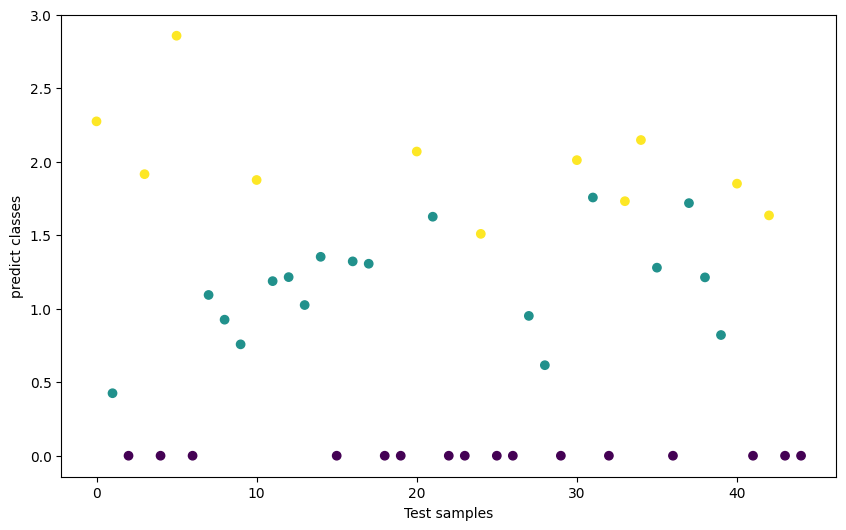

In [182]:
y_pred_nonlinn = nonlinear_neuron.predict(X_test)
plot_classification(y_pred_nonlinn, y_test)


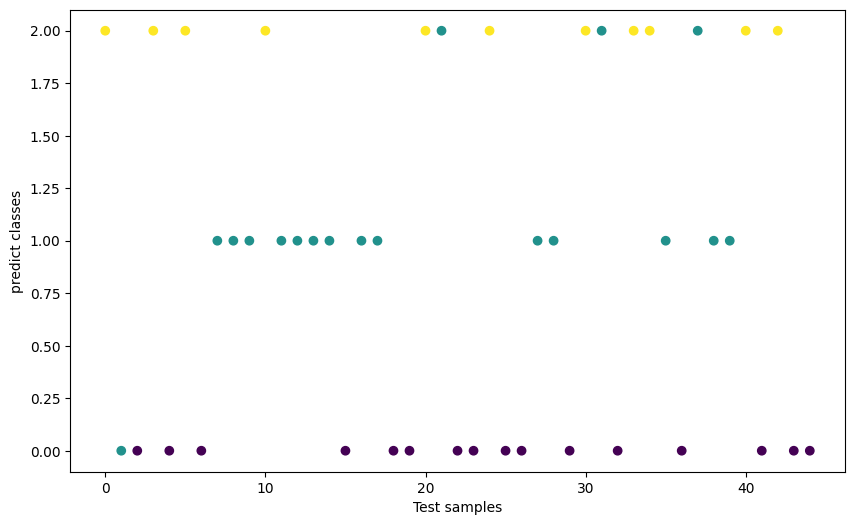

In [185]:
y_class_neuron = tresholding(y_pred_nonlinn)

plot_classification(y_class_neuron, y_test)

# Multi Layer Perceptron

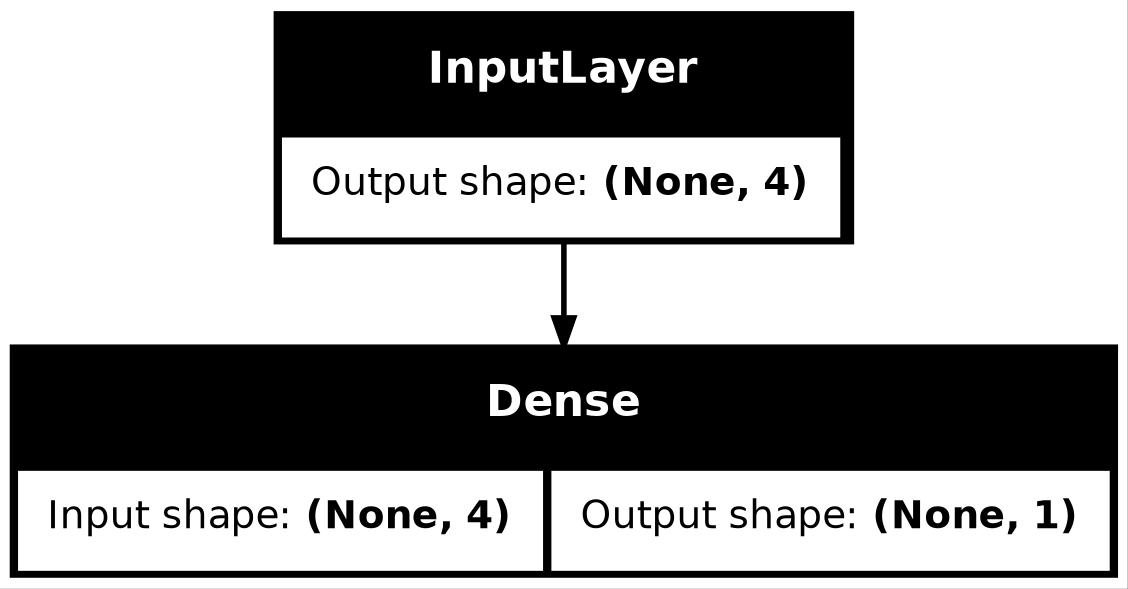

In [186]:
input_layer = Input(shape=(num_features, ))
hidden_layer_1 = Dense(num_features, activation="relu")(input_layer)
hidden_layer_2 = Dense(int(num_features/2),activation="relu")(hidden_layer_1)
output_layer = Dense(1, activation="relu")(hidden_layer_2)

output_layer = Dense(1, activation="relu")(hidden_layer_2)
mlp = Model(inputs=[input_layer], outputs=[output_layer])

mlp.compile(optimizer='sgd', loss="mse")

keras.utils.plot_model(adaline, to_file="mlp.jpg", show_shapes= True)



In [188]:
mlp.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=X_train.shape[0],
    validation_data=(X_test, y_test),
    verbose=2,
)

Epoch 1/300


/home/radekbys/Code/Neural_Networks/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_42']. Received: the structure of inputs=*
  warnings.warn(


1/1 - 1s - 908ms/step - loss: 1.2100 - val_loss: 0.5967
Epoch 2/300
1/1 - 0s - 30ms/step - loss: 0.6381 - val_loss: 0.5792
Epoch 3/300
1/1 - 0s - 30ms/step - loss: 0.5742 - val_loss: 0.5456
Epoch 4/300
1/1 - 0s - 37ms/step - loss: 0.5351 - val_loss: 0.5102
Epoch 5/300
1/1 - 0s - 29ms/step - loss: 0.4995 - val_loss: 0.4783
Epoch 6/300
1/1 - 0s - 33ms/step - loss: 0.4671 - val_loss: 0.4477
Epoch 7/300
1/1 - 0s - 30ms/step - loss: 0.4370 - val_loss: 0.4206
Epoch 8/300
1/1 - 0s - 29ms/step - loss: 0.4096 - val_loss: 0.3947
Epoch 9/300
1/1 - 0s - 27ms/step - loss: 0.3839 - val_loss: 0.3711
Epoch 10/300
1/1 - 0s - 28ms/step - loss: 0.3601 - val_loss: 0.3491
Epoch 11/300
1/1 - 0s - 28ms/step - loss: 0.3379 - val_loss: 0.3286
Epoch 12/300
1/1 - 0s - 28ms/step - loss: 0.3173 - val_loss: 0.3090
Epoch 13/300
1/1 - 0s - 27ms/step - loss: 0.2979 - val_loss: 0.2916
Epoch 14/300
1/1 - 0s - 31ms/step - loss: 0.2800 - val_loss: 0.2749
Epoch 15/300
1/1 - 0s - 29ms/step - loss: 0.2631 - val_loss: 0.2589


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


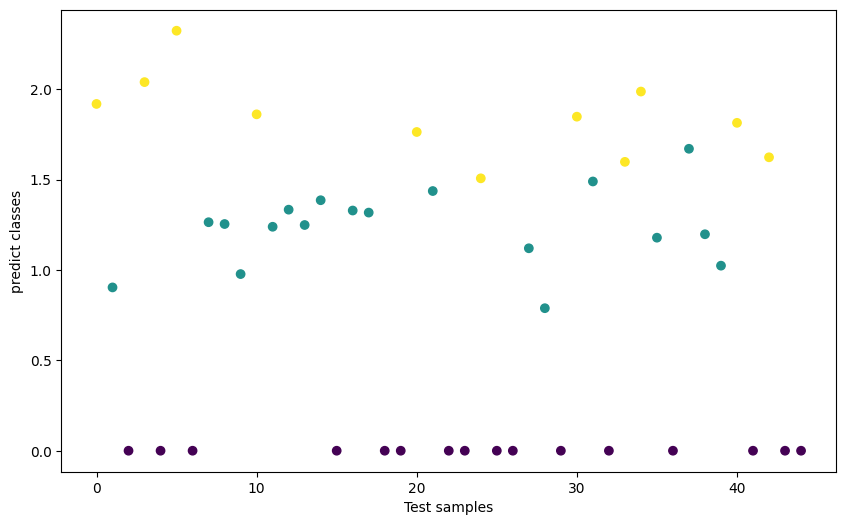

In [189]:
y_pred_mlp = mlp.predict(X_test)
plot_classification(y_pred_mlp, y_test)

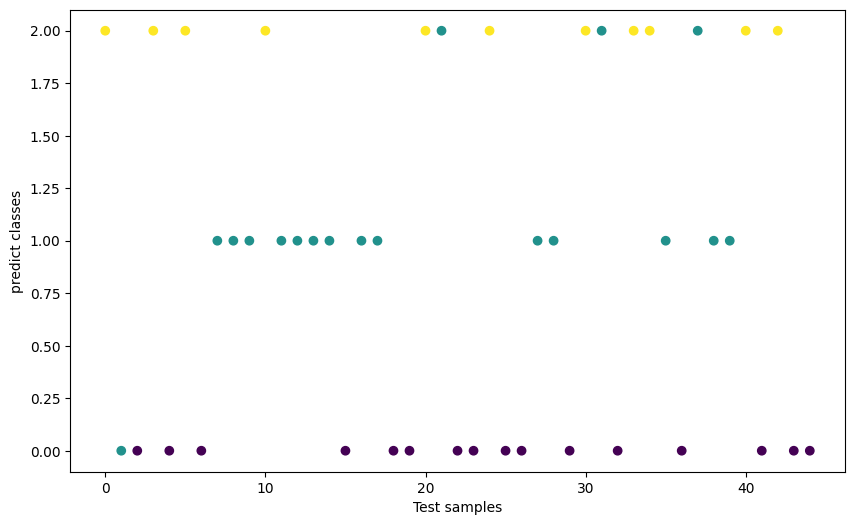

In [190]:
y_class_mlp = tresholding(y_pred_nonlinn)

plot_classification(y_class_mlp, y_test)